In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import overpass
import overpy
from shapely.ops import polygonize, polygonize_full, unary_union, linemerge
import shapely.geometry as geometry
import numpy as np
import ee
import folium
import pprint
import json
from rasterio.plot import show
import rasterio

In [2]:
ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AY0e-g7fm4gJzTel2EKtJB-E6cf4GeF0v5TXlbU59zZwjAkJ7Dh7zYX_ecQ



Successfully saved authorization token.


In [4]:
api = overpass.API()
over = overpy.Overpass()

dataset = ee.ImageCollection("SKYSAT/GEN-A/PUBLIC/ORTHO/RGB")
info = dataset.first().getInfo()

In [45]:
bounds = info['properties']['system:footprint']
coord = np.array(bounds['coordinates'])
xmin_value=np.min(coord[:,0])
min_x_vectors = coord[np.where(coord[:, 0] == xmin_value)]
minimum = np.argmin(min_x_vectors[:, 1])
xmax_value=np.max(coord[:,0])
max_x_vectors = coord[np.where(coord[:, 0] == xmax_value)]
maximum = np.argmax(max_x_vectors[:, 1])
x0,y0=min_x_vectors[minimum]
x1,y1=max_x_vectors[maximum]
bounds = str(y0)+","+str(x0)+','+ str(y1)+',' +str(x1)
print(bounds)

img = dataset.first().visualize()
api_data = api.get('way('+bounds+ ') ["highway"];(._;>;);', verbosity='geom')
raster = rasterio.open("../example.tif")

38.56189533389399,-122.53814465503827,38.70892482524814,-122.38922726999952


In [46]:
#Make a GeoDataFrame from the data gathered from the query
gdf = gpd.GeoDataFrame.from_features(api_data['features'])

#Filter out all results except for the actual polylines and print a sampling
gdf = gdf[gdf['geometry'].apply(lambda x : x.type=='LineString')]

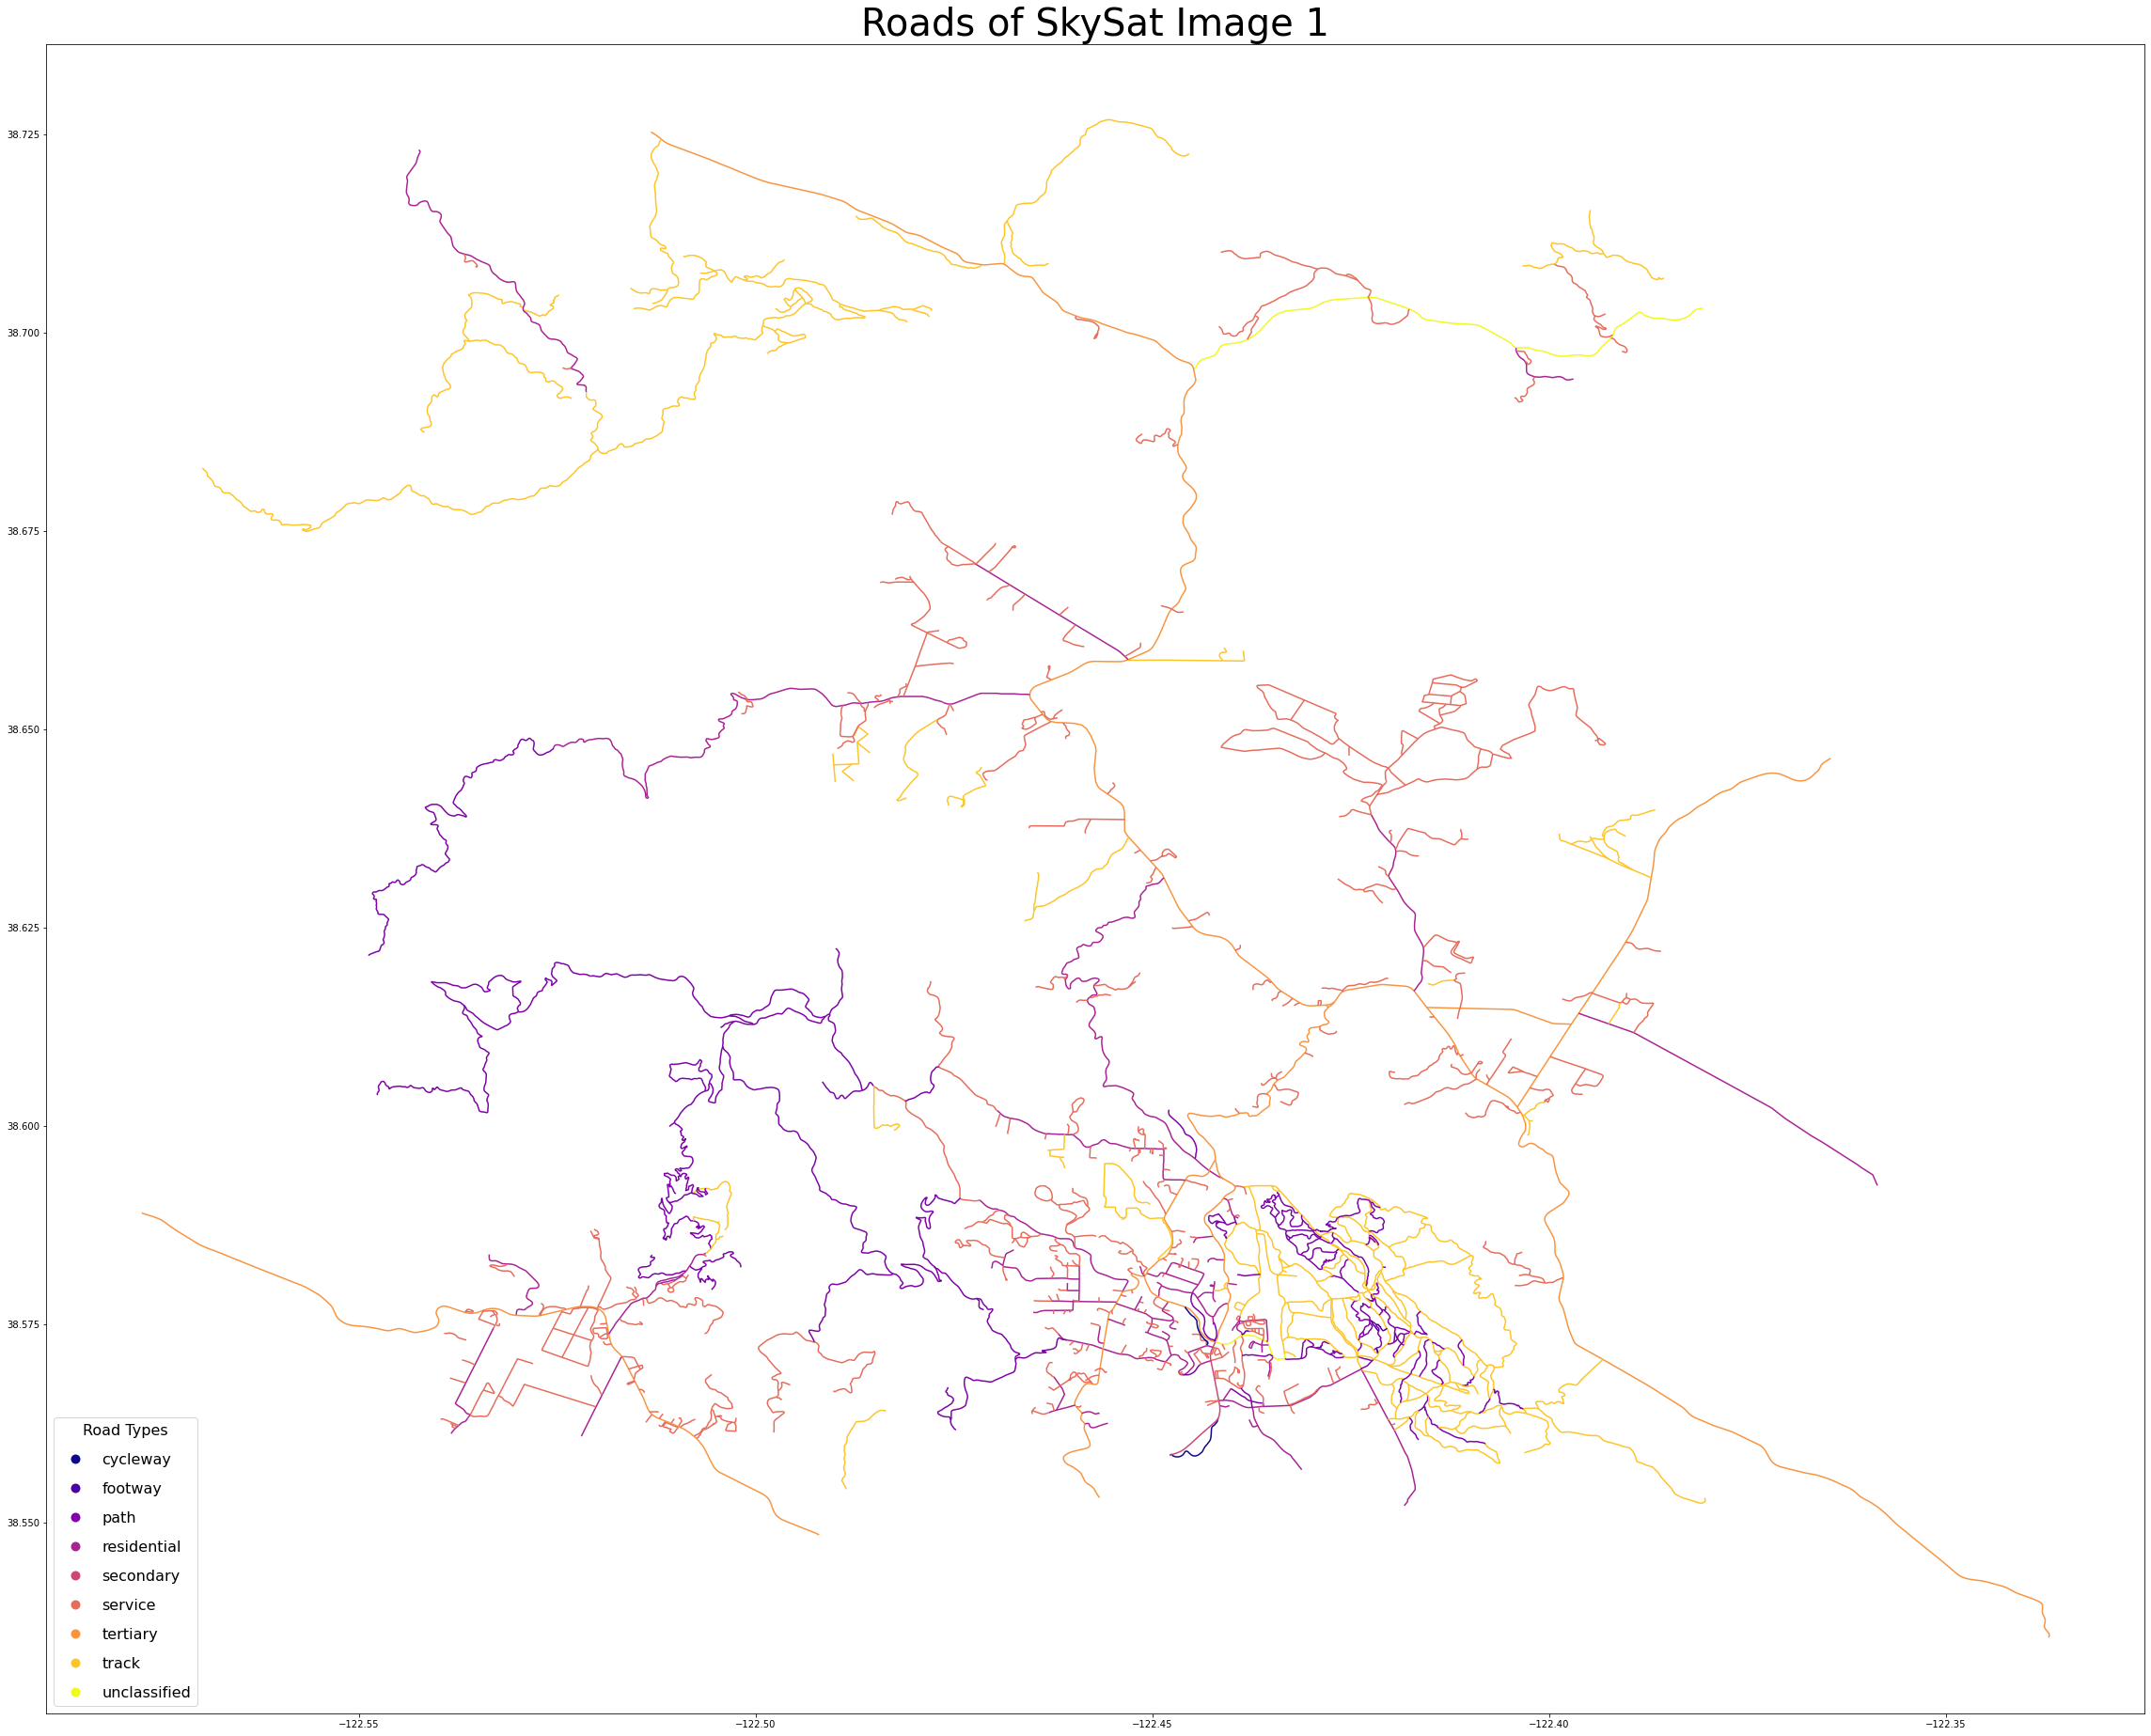

In [48]:
#plot the results to visualize the polylines
fig, ax = plt.subplots(figsize=(40,40))
legend_kwds={'loc': "lower left", 'fontsize': "16", 'title': "Road Types", 'title_fontsize': "16", 'labelspacing': 1}
ax.set_title("Roads of SkySat Image 1", fontsize=40)
#show(raster, ax=ax)
gdf.plot(column = 'highway', ax=ax, cmap="plasma", legend=True, legend_kwds=legend_kwds)
plt.show()